### Note: Try to integrate R and Python in the same notebook in the future.

In [16]:
#analysis packages
import gen_analysis as gn
import pandas as pd
import numpy as np
import scipy as sp

#plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

#generate higher resolution plots
%config InlineBackend.figure_format='retina'

### In this jupyter notebook, I will analyze the length and extent of calcification of mouse femur bones after drug treatment.

In [17]:
#read in files
pbs = pd.read_csv("PBS_femurs.csv", header = None).dropna()
pbs = pbs.reset_index(drop = True)

ste = pd.read_csv("STE_femurs.csv", header = None).dropna()
ste = ste.reset_index(drop = True)

cb = pd.read_csv("CB_femurs.csv", header = None).dropna()
cb = cb.reset_index(drop = True)

In [18]:
#look at top 5 entries
pbs.head()

,0,1,2,3,4
0,22B,0.296,0.269,0.155,0.129
1,22D,0.276,0.243,0.146,0.129
2,22H,0.220,0.234,0.109,0.144
3,27G,0.228,0.233,0.147,0.137
4,27H,0.251,0.258,0.099,0.098


In [19]:
#list of dataframes 
treatments = [pbs, ste, cb]
labels = ["PBS", "Snus", "Camel Blue"]
column_names = ["ID", "left femur", "right femur", "left femur calcium", "right femur calcium"]

list_df = []
for i in range(3):
    treatments[i].columns = column_names
    treatments[i]["Label"] = labels[i]
    list_df.append(treatments[i])        

In [20]:
#combine dataframes
comb_df = pd.concat(list_df)

In [21]:
#organize by locations
locations = comb_df.columns.unique()[1:5]

sep_loc = []
for i in locations:
    sep_loc.append(comb_df[["ID", i, "Label"]])

In [22]:
#take a look
sep_loc[0][["left femur","Label"]].head()

,left femur,Label
0,0.296,PBS
1,0.276,PBS
2,0.220,PBS
3,0.228,PBS
4,0.251,PBS


In [23]:
treatments[0]

,ID,left femur,right femur,left femur calcium,right femur calcium,Label
0,22B,0.296,0.269,0.155,0.129,PBS
1,22D,0.276,0.243,0.146,0.129,PBS
2,22H,0.220,0.234,0.109,0.144,PBS
3,27G,0.228,0.233,0.147,0.137,PBS
4,27H,0.251,0.258,0.099,0.098,PBS
5,31A,0.216,0.215,0.158,0.147,PBS
6,31B,0.259,0.308,0.154,0.167,PBS
7,31C,0.221,0.240,0.125,0.129,PBS
8,31E,0.204,0.259,0.128,0.141,PBS
9,40B,0.292,0.283,0.098,0.125,PBS


In [24]:
#list of dataframes
treatments = [pbs, ste, cb]
labels = ["PBS", "Snus", "Camel Blue"]
location = ["left femur", "right femur", "left femur calcium", "right femur calcium"]

#calculate ecdf for all
ecdf_values = []
for i in range(3):
    for j in range(4):
        ecdf = gn.ecdf.values(treatments[i][location[j]].values, labels[i])
        ecdf["location"] = location[j]
        ecdf["ID"] = treatments[i]["ID"]
        ecdf_values.append(ecdf)

In [25]:
#The length of list makes sense
len(ecdf_values)

12

In [26]:
#take a look
ecdf_values[1].head()

,ecdf,Label,Values,location,ID
0,0.026316,PBS,0.215,right femur,22B
1,0.052632,PBS,0.233,right femur,22D
2,0.078947,PBS,0.233,right femur,22H
3,0.105263,PBS,0.234,right femur,27G
4,0.131579,PBS,0.235,right femur,27H


In [27]:
#organize list by location
left_femur = []
right_femur = []
left_femur_calcium = []
right_femur_calcium = []

for i in range(0,12):
    if (ecdf_values[i]["location"] == "left femur").all() == True:
        left_femur.append(ecdf_values[i])
    elif (ecdf_values[i]["location"] == "right femur").all() == True:
        right_femur.append(ecdf_values[i])
    elif (ecdf_values[i]["location"] == "left femur calcium").all() == True:
        left_femur_calcium.append(ecdf_values[i])
    else:
        right_femur_calcium.append(ecdf_values[i])

In [28]:
left_femur[0].head()

,ecdf,Label,Values,location,ID
0,0.026316,PBS,0.204,left femur,22B
1,0.052632,PBS,0.216,left femur,22D
2,0.078947,PBS,0.216,left femur,22H
3,0.105263,PBS,0.220,left femur,27G
4,0.131579,PBS,0.221,left femur,27H


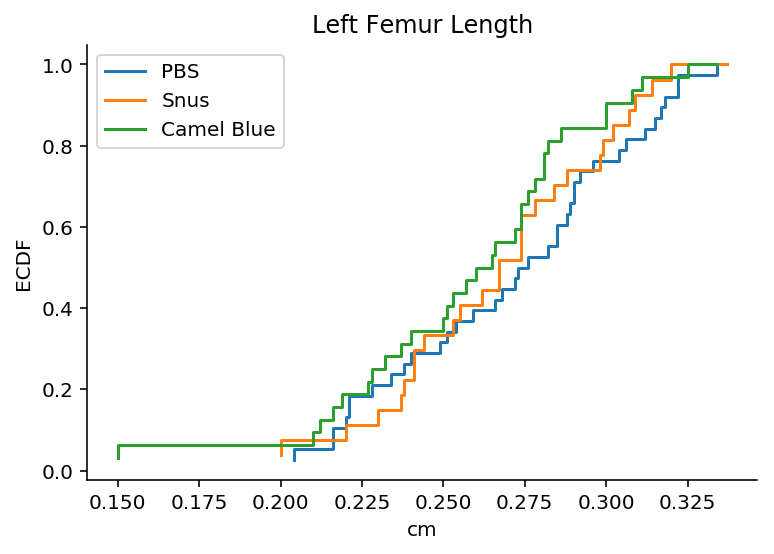

In [29]:
for i in range(3):
    plt.step(left_femur[i]["Values"], left_femur[i]["ecdf"], label = left_femur[i]["Label"][0])
plt.legend()
plt.title("Left Femur Length")
plt.xlabel("cm")
plt.ylabel("ECDF")
sns.despine()

Text(0, 0.5, 'ecdf')

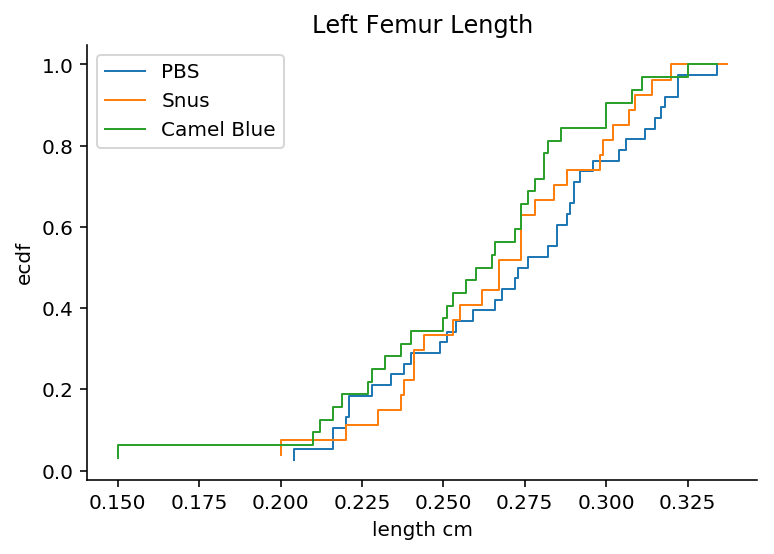

In [30]:
gn.ecdf.plot(sep_loc[0][["left femur","Label"]], "Label", "left femur")
plt.title("Left Femur Length")
plt.xlabel("length cm")
plt.ylabel("ecdf")

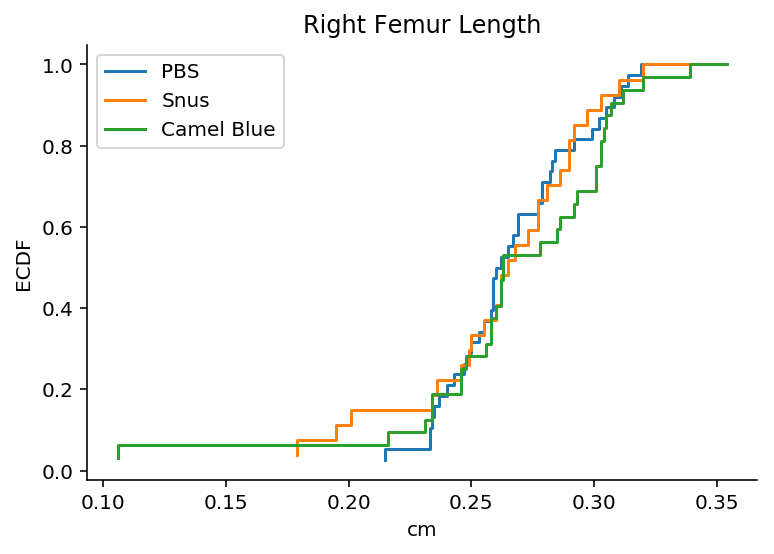

In [31]:
for i in range(3):
    plt.step(right_femur[i]["Values"], right_femur[i]["ecdf"], label = right_femur[i]["Label"][0])
plt.title("Right Femur Length")
plt.legend()
plt.xlabel("cm")
plt.ylabel("ECDF")
sns.despine()

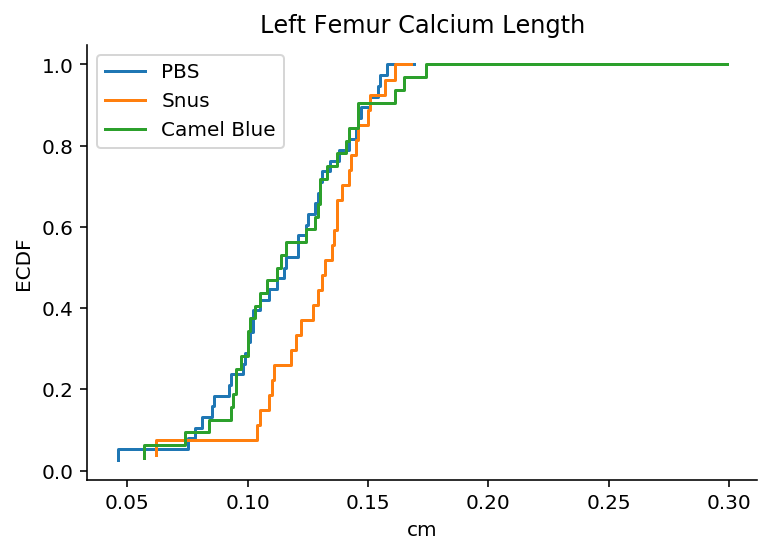

In [32]:
for i in range(3):
    plt.step(left_femur_calcium[i]["Values"], left_femur_calcium[i]["ecdf"], 
             label = left_femur_calcium[i]["Label"][0])
plt.title("Left Femur Calcium Length")
plt.legend()
plt.xlabel("cm")
plt.ylabel("ECDF")
sns.despine()

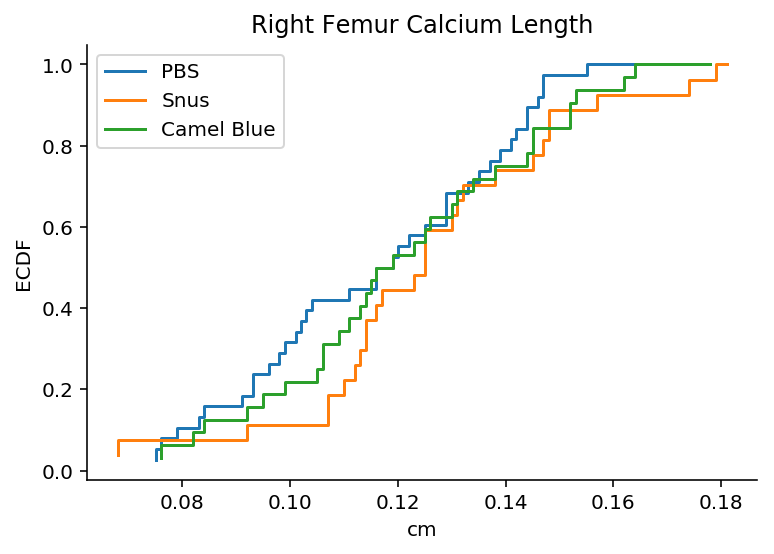

In [33]:
for i in range(3):
    plt.step(right_femur_calcium[i]["Values"], right_femur_calcium[i]["ecdf"],
             label = right_femur_calcium[i]["Label"][0])
plt.title("Right Femur Calcium Length")
plt.legend()
plt.xlabel("cm")
plt.ylabel("ECDF")
sns.despine()

In [34]:
list_all = [left_femur, right_femur, left_femur_calcium, right_femur_calcium]
all_data = [pd.concat(i) for i in list_all] 

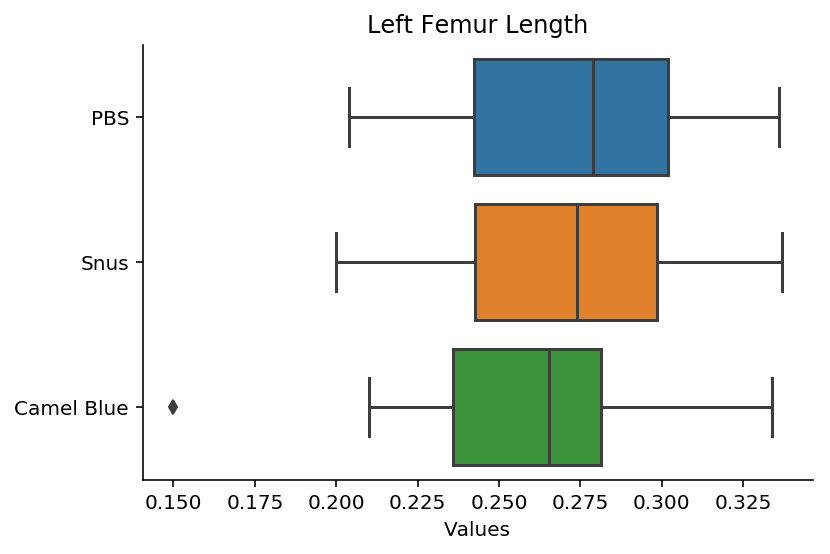

In [35]:
sns.boxplot(all_data[0]["Values"], all_data[0]["Label"])
plt.title("Left Femur Length")
plt.ylabel("")
sns.despine()

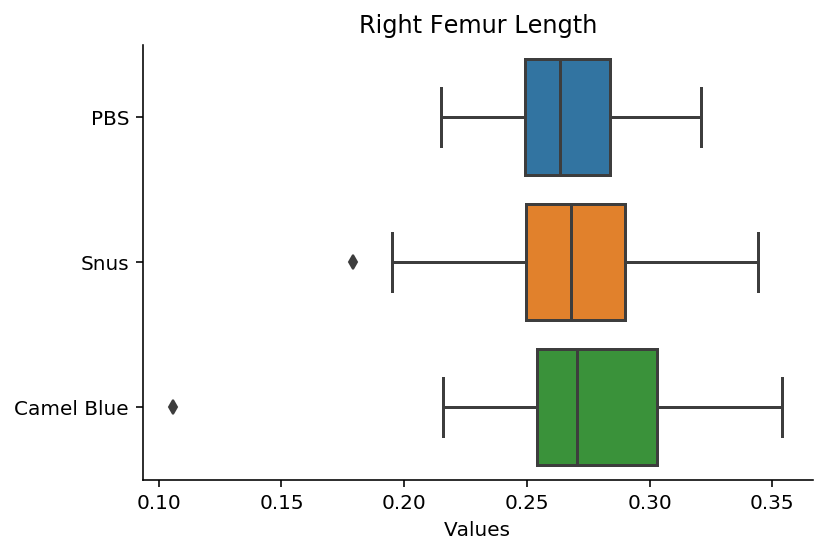

In [36]:
sns.boxplot(all_data[1]["Values"], all_data[1]["Label"])
plt.title("Right Femur Length")
plt.ylabel("")
sns.despine()

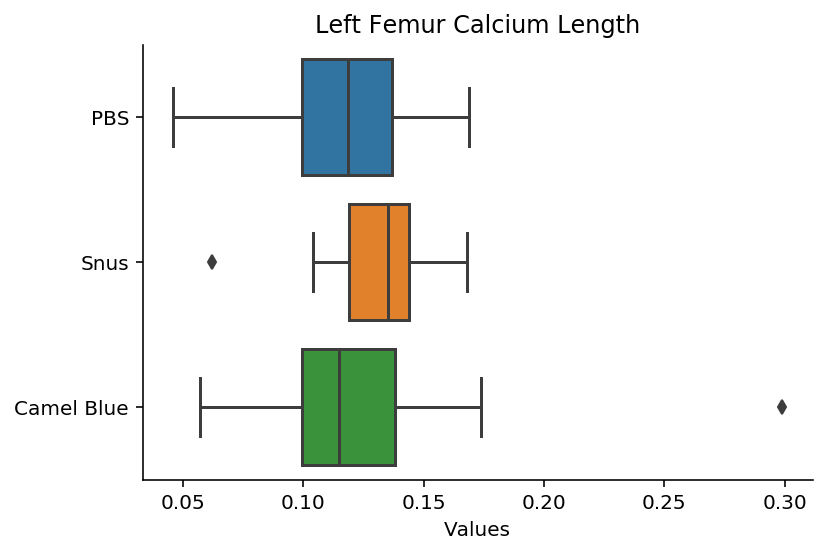

In [37]:
sns.boxplot(all_data[2]["Values"], all_data[2]["Label"])
plt.title("Left Femur Calcium Length")
plt.ylabel("")
sns.despine()

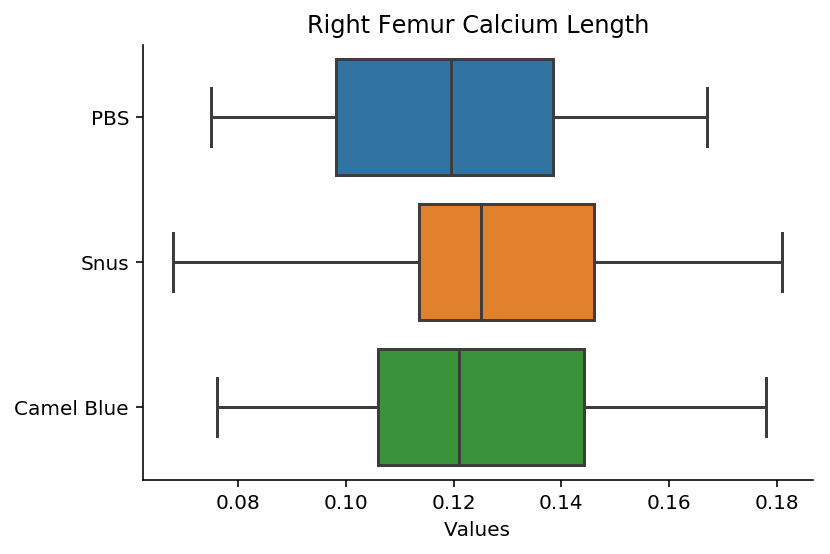

In [38]:
sns.boxplot(all_data[3]["Values"], all_data[3]["Label"])
plt.title("Right Femur Calcium Length")
plt.ylabel("")
sns.despine()

### We will now look at normalized calcium length.

In [39]:
#normalize calcium
all_data[2]["Normalized Calcium"] = all_data[2]["Values"]/all_data[0]["Values"]
all_data[3]["Normalized Calcium"] = all_data[3]["Values"]/all_data[1]["Values"]

In [40]:
#defined all data #CB <10x was carried over from forearm code(never was imported to this file)
left_femur_alldata = all_data[2].loc[all_data[2]["Label"] != "CB < 10X"]
right_femur_alldata = all_data[3].loc[all_data[3]["Label"] != "CB < 10X"]

In [41]:
#export csv
left_femur_alldata.to_csv("left_femur_normalized_calcium.csv")
right_femur_alldata.to_csv("right_femur_normalized_calcium.csv")

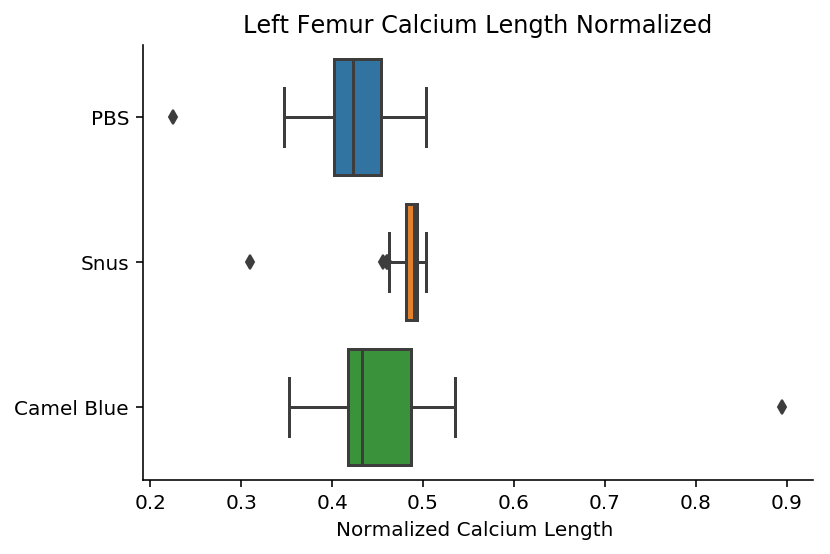

In [42]:
sns.boxplot(left_femur_alldata["Normalized Calcium"], left_femur_alldata["Label"])
plt.title("Left Femur Calcium Length Normalized")
plt.ylabel("")
plt.xlabel("Normalized Calcium Length ")
sns.despine()

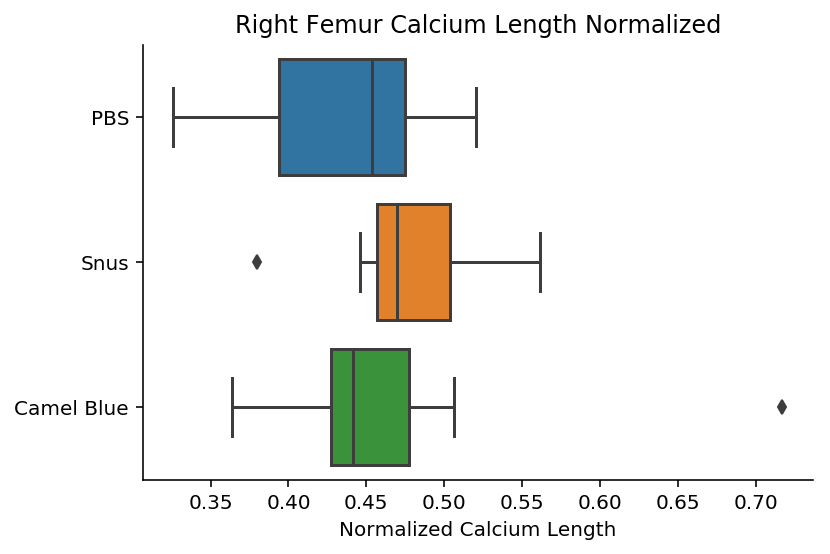

In [43]:
sns.boxplot(right_femur_alldata["Normalized Calcium"], right_femur_alldata["Label"])
plt.title("Right Femur Calcium Length Normalized")
plt.ylabel("")
plt.xlabel("Normalized Calcium Length")
sns.despine()

In [44]:
all_data[2]

,ecdf,Label,Values,location,ID,Normalized Calcium
0,0.026316,PBS,0.046,left femur calcium,22B,0.225490
1,0.052632,PBS,0.075,left femur calcium,22D,0.347222
2,0.078947,PBS,0.078,left femur calcium,22H,0.361111
3,0.105263,PBS,0.081,left femur calcium,27G,0.368182
4,0.131579,PBS,0.085,left femur calcium,27H,0.384615
5,0.157895,PBS,0.086,left femur calcium,31A,0.389140
6,0.184211,PBS,0.092,left femur calcium,31B,0.403509
7,0.210526,PBS,0.093,left femur calcium,31C,0.397436
8,0.236842,PBS,0.098,left femur calcium,31E,0.411765
9,0.263158,PBS,0.099,left femur calcium,40B,0.412500


In [45]:
labels = ["PBS", "Snus", "Camel Blue"]

left_femur_calcium = [all_data[2].loc[all_data[2]["Label"] == i] for i in labels]
right_femur_calcium = [all_data[3].loc[all_data[3]["Label"] == i] for i in labels]

In [46]:
left_femur_calcium[0].head()

,ecdf,Label,Values,location,ID,Normalized Calcium
0,0.026316,PBS,0.046,left femur calcium,22B,0.225490
1,0.052632,PBS,0.075,left femur calcium,22D,0.347222
2,0.078947,PBS,0.078,left femur calcium,22H,0.361111
3,0.105263,PBS,0.081,left femur calcium,27G,0.368182
4,0.131579,PBS,0.085,left femur calcium,27H,0.384615


In [47]:
#calculate ecdf for all post normalization
combine_cal = [left_femur_calcium, right_femur_calcium]

ecdf_values = []
for i in range(2):
    for j in range(3):
        ecdf = gn.ecdf.values(combine_cal[i][j]["Normalized Calcium"].values, combine_cal[i][j]["Label"][0])
        ecdf["ID"] = combine_cal[i][j]["ID"]
        ecdf_values.append(ecdf)

In [48]:
#organize list by location post normalization
left_femur_calcium_norm = []
for i in range(3):
    left_femur_calcium_norm.append(ecdf_values[i])
    
right_femur_calcium_norm = []
for i in range(3,6):
    right_femur_calcium_norm.append(ecdf_values[i])

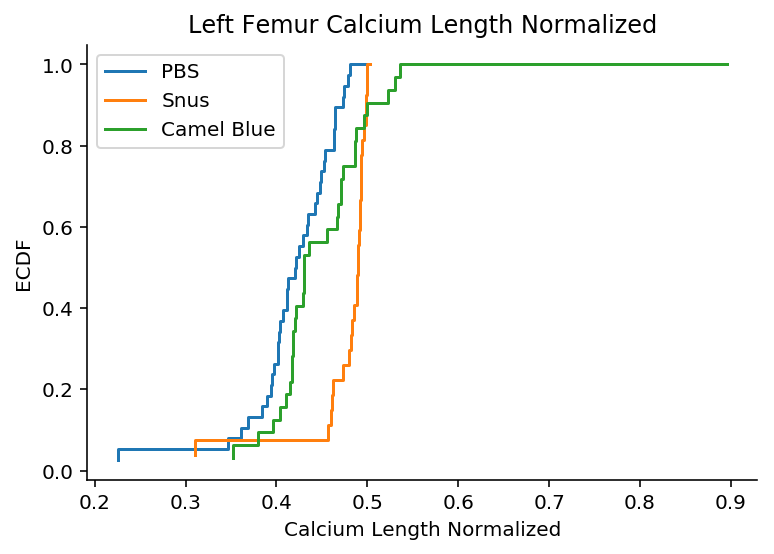

In [49]:
for i in range(3):
    plt.step(left_femur_calcium_norm[i]["Values"], left_femur_calcium_norm[i]["ecdf"],
             label = left_femur_calcium_norm[i]["Label"][0])
plt.title("Left Femur Calcium Length Normalized")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
sns.despine()

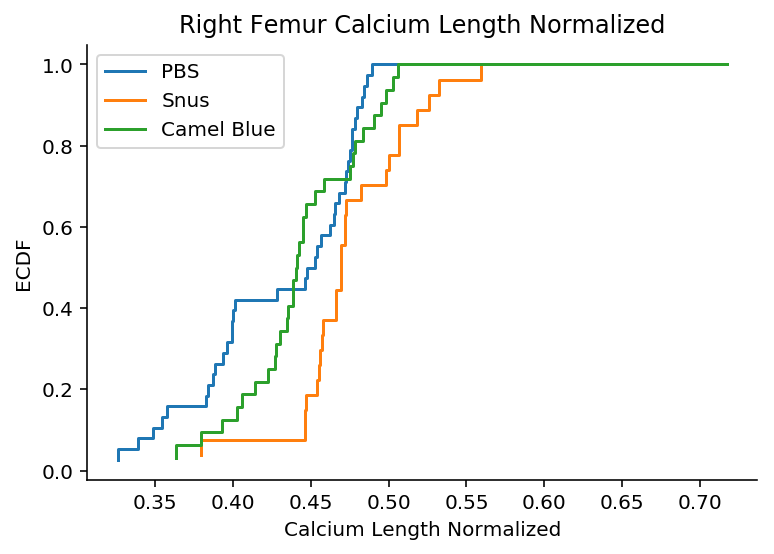

In [50]:
for i in range(3):
    plt.step(right_femur_calcium_norm[i]["Values"], right_femur_calcium_norm[i]["ecdf"],
             label = right_femur_calcium_norm[i]["Label"][0])
plt.title("Right Femur Calcium Length Normalized")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
plt.annotate("", (0.45,0.6))
sns.despine()

### Combined femurs

In [51]:
femur_combined = [pd.concat([left_femur_calcium_norm[i], right_femur_calcium_norm[i]]) for i in range(3)]

In [52]:
#calculate ecdf after combining femurs
ecdf_values = []
for i in range(3):
    ecdf = gn.ecdf.values(femur_combined[i]["Values"].values, femur_combined[i]["Label"].iloc[0])
    ecdf["ID"] = femur_combined[i]["ID"].reset_index(drop = True)
    ecdf_values.append(ecdf)

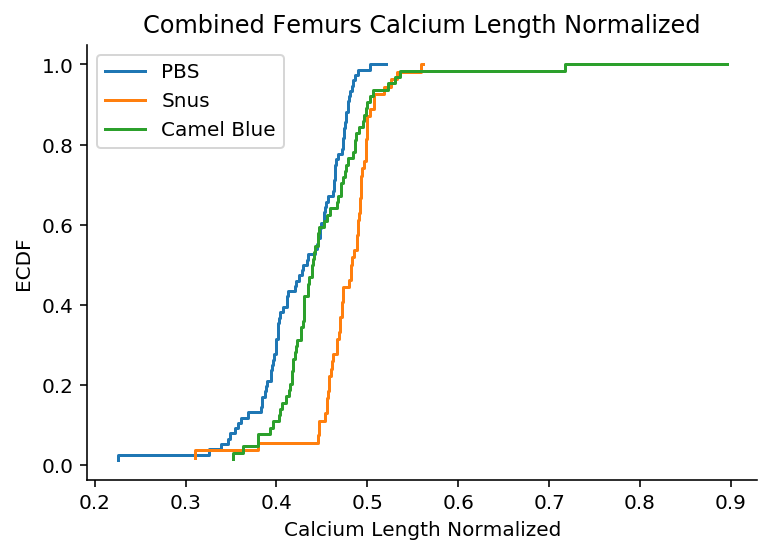

In [53]:
for i in range(3):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0])
plt.title("Combined Femurs Calcium Length Normalized")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
plt.annotate("", (0.45,0.6))
sns.despine()

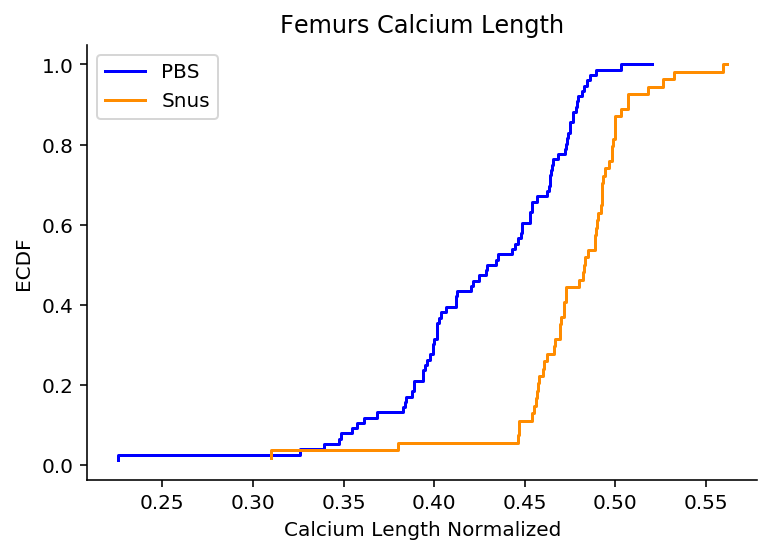

In [54]:
color = ["blue", "darkorange"]
j = 0 
for i in range(2):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0], color = color[j])
    j += 1
plt.title("Femurs Calcium Length")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
plt.annotate("", (0.45,0.6))
sns.despine()

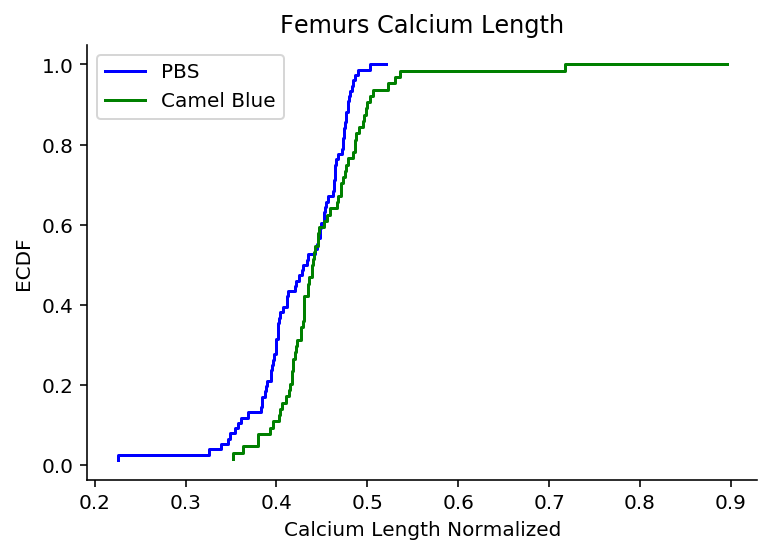

In [55]:
color = ["blue", "green"]
j = 0 
for i in np.arange(0,3,2):
    plt.step(ecdf_values[i]["Values"], ecdf_values[i]["ecdf"],
             label = ecdf_values[i]["Label"][0], color = color[j])
    j += 1
plt.title("Femurs Calcium Length")
plt.legend()
plt.xlabel("Calcium Length Normalized")
plt.ylabel("ECDF")
plt.annotate("", (0.45,0.6))
sns.despine()

In [56]:
#combined dataframe
combined = pd.concat(ecdf_values)
combined.to_csv("combined_femurs_normalized.csv")

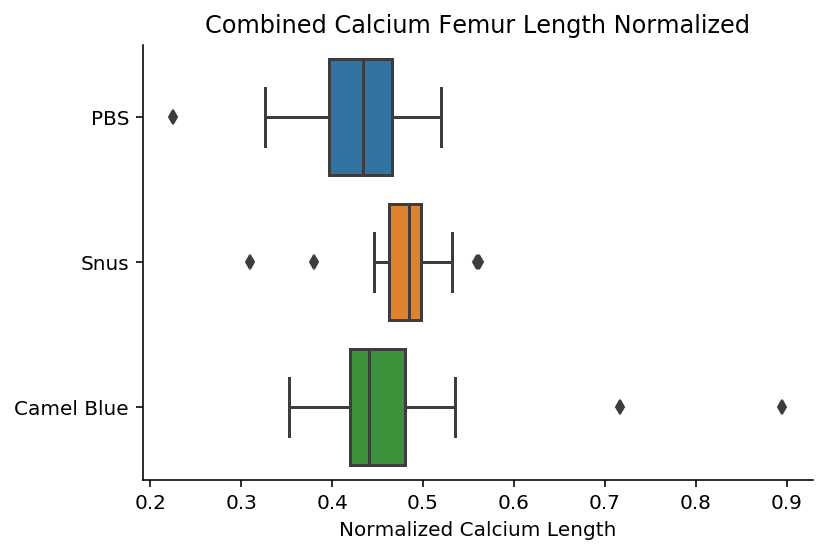

In [57]:
sns.boxplot(combined["Values"], combined["Label"])
plt.title("Combined Calcium Femur Length Normalized")
plt.ylabel("")
plt.xlabel("Normalized Calcium Length")
sns.despine()

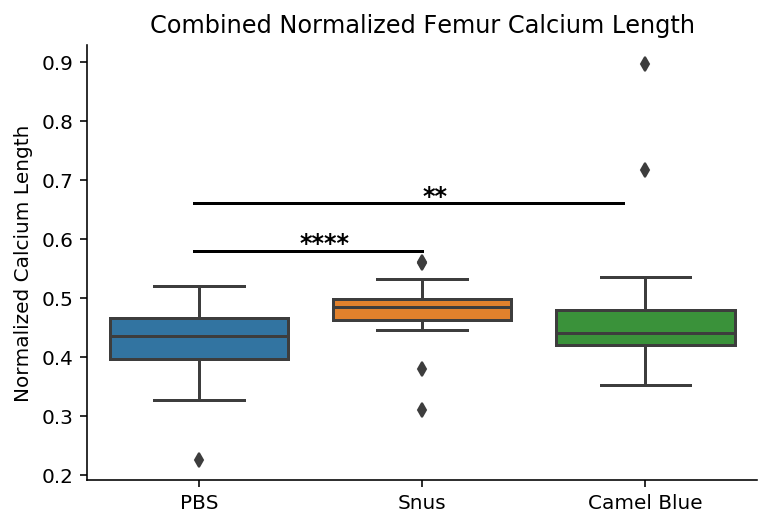

In [58]:
sns.boxplot(combined["Label"], combined["Values"])
plt.xlabel("")
plt.ylabel("Normalized Calcium Length")
plt.title("Combined Normalized Femur Calcium Length")
plt.annotate("****", (0.45,0.58), rotation=0,  color='k',  weight='bold', fontsize = 12)
plt.annotate("**", (1,0.66), rotation=0,  color='k',  weight='bold', fontsize = 12)
plt.axhline(y=0.58, xmin=0.16, xmax=0.5, color = "k")
plt.axhline(y=0.66, xmin=0.16, xmax=0.8, color = "k")
sns.despine()

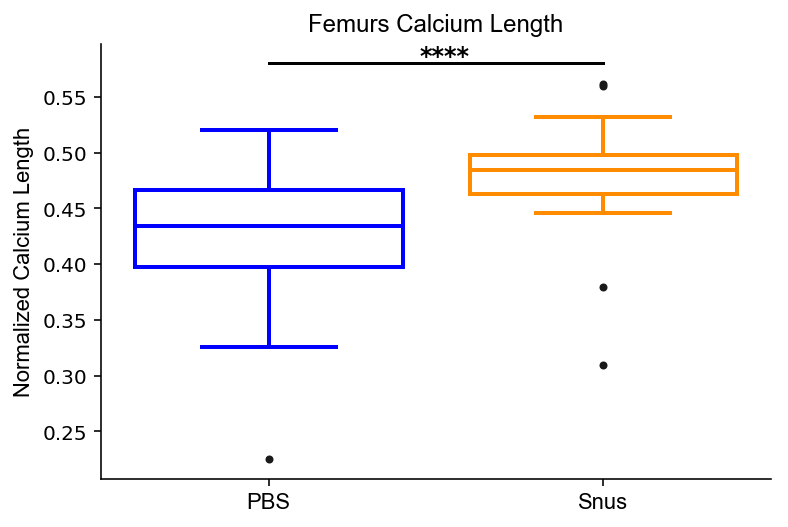

In [59]:
flierprops = dict(markerfacecolor='0.1', markersize=3,
              marker='o', markeredgecolor = "0.1")

ax = sns.boxplot((combined.loc[combined["Label"] != "Camel Blue"]["Label"]),
            (combined.loc[combined["Label"] != "Camel Blue"]["Values"]),
           linewidth = 2, color = "white", flierprops = flierprops)
color = ["blue", "darkorange"]

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor(color[i])
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color(color[i])

plt.ylabel("Normalized Calcium Length", fontsize = 11, fontname = "Arial")
plt.xlabel("")
plt.xticks(fontsize = 11, fontname = "Arial")
plt.title("Femurs Calcium Length", fontname = "Arial")
plt.annotate("****", (0.45,0.58), rotation=0,  color='k',  weight='bold', fontsize = 12)
plt.axhline(y=0.58, xmin=0.25, xmax=0.75, color = "k")
sns.despine()

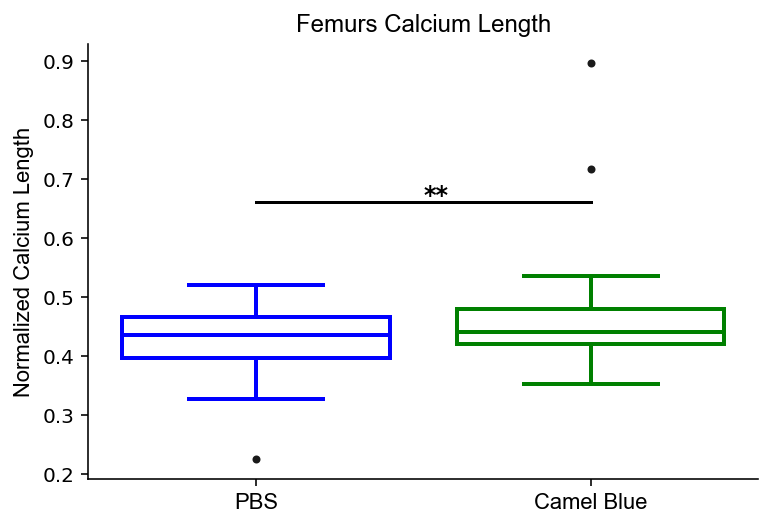

In [60]:
flierprops = dict(markerfacecolor='0.1', markersize=3,
              marker='o', markeredgecolor = "0.1")

ax = sns.boxplot((combined.loc[combined["Label"] != "Snus"]["Label"]),
            (combined.loc[combined["Label"] != "Snus"]["Values"]),
           linewidth = 2, color = "white", flierprops = flierprops)
color = ["blue", "green"]

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor(color[i])
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color(color[i])

plt.ylabel("Normalized Calcium Length", fontsize = 11, fontname = "Arial")
plt.xlabel("")
plt.xticks(fontsize = 11, fontname = "Arial")
plt.title("Femurs Calcium Length", fontname = "Arial")
plt.annotate("**", (.5,0.66), rotation=0,  color='k',  weight='bold', fontsize = 12)
plt.axhline(y=0.66, xmin=0.25, xmax=0.75, color = "k")
sns.despine()

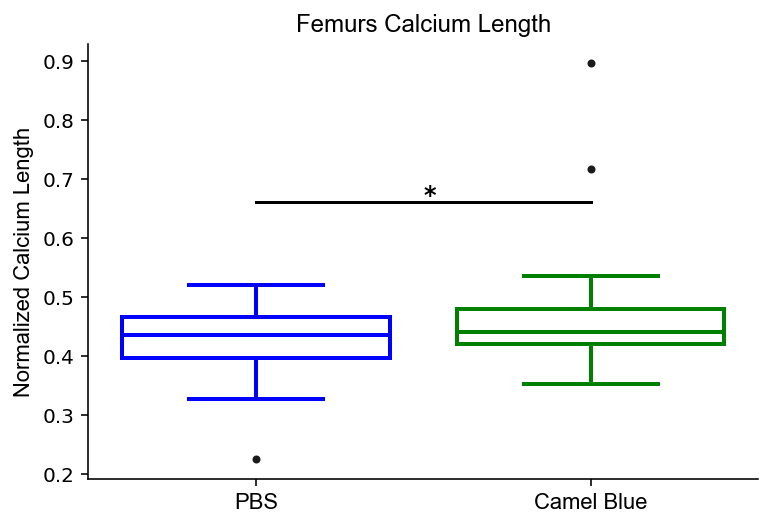

In [61]:
##with Wilcoxin t-test instead of ANOVA
flierprops = dict(markerfacecolor='0.1', markersize=3,
              marker='o', markeredgecolor = "0.1")

ax = sns.boxplot((combined.loc[combined["Label"] != "Snus"]["Label"]),
            (combined.loc[combined["Label"] != "Snus"]["Values"]),
           linewidth = 2, color = "white", flierprops = flierprops)
color = ["blue", "green"]

# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor(color[i])
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color(color[i])

plt.ylabel("Normalized Calcium Length", fontsize = 11, fontname = "Arial")
plt.xlabel("")
plt.xticks(fontsize = 11, fontname = "Arial")
plt.title("Femurs Calcium Length", fontname = "Arial")
plt.annotate("*", (.5,0.66), rotation=0,  color='k',  weight='bold', fontsize = 12)
plt.axhline(y=0.66, xmin=0.25, xmax=0.75, color = "k")
sns.despine()